In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.special import rel_entr

# Data Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [ ]:
df = pd.read_csv('paysim.csv')

In [ ]:
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (6362620, 11)
Columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

Data Types:
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
#Summary of Statistics of Numeric Variables
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.describe(include=['object'])


,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1530544995,C1286084959
freq,2237500,3,113


In [ ]:
Total_transactions = len(df)
normal = len(df[df.isFraud == 0])
fraudulent = len(df[df.isFraud == 1])
fraud_percentage = round(fraudulent/Total_transactions*100, 2)
print('Total number of Transactions are {}'.format(Total_transactions))
print('Number of Normal Transactions are {}'.format(normal))
print('Number of fraudulent transactions are {}'.format(fraudulent))
print('Percentage of Fraud Transactions is {}'.format(fraud_percentage))

Total number of Transactions are 6362620
Number of Normal Transactions are 6354407
Number of fraudulent transactions are 8213
Percentage of Fraud Transactions is 0.13


In [ ]:
normal_percentage = round(normal/Total_transactions*100, 2)
print('Percentage of Normal Transactions is {}'.format(normal_percentage))

Percentage of Normal Transactions is 99.87



Target Distribution:
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


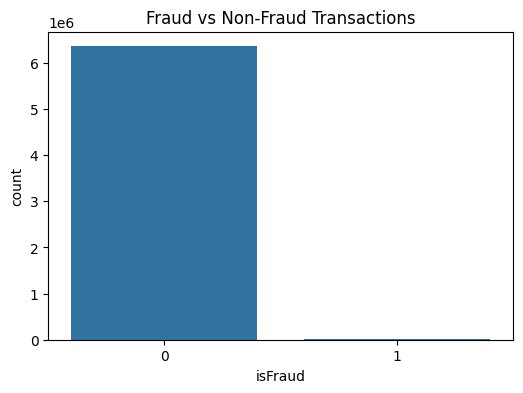

In [ ]:
print("\nTarget Distribution:")
print(df['isFraud'].value_counts(normalize=True))

plt.figure(figsize=(6,4))
sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()


Transaction Types and Fraud Proportions:
            count  fraud_rate
type                         
CASH_OUT  2237500    0.001840
PAYMENT   2151495    0.000000
CASH_IN   1399284    0.000000
TRANSFER   532909    0.007688
DEBIT       41432    0.000000


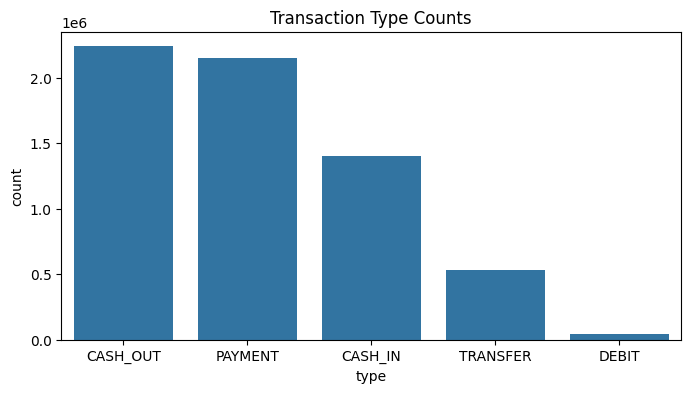

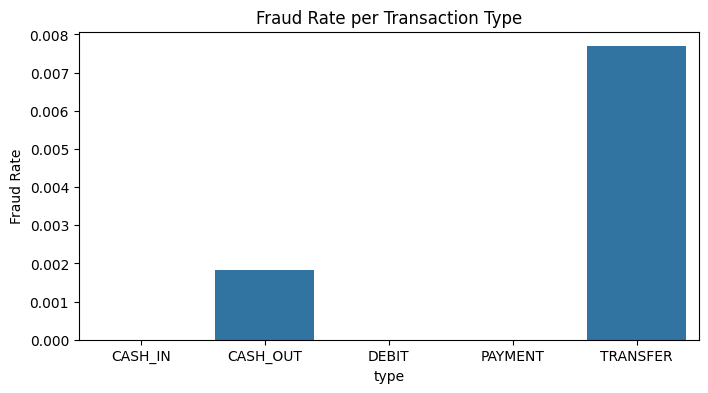

In [ ]:
print("\nTransaction Types and Fraud Proportions:")
type_counts = df['type'].value_counts()
type_fraud = df.groupby('type')['isFraud'].mean()

print(pd.concat([type_counts, type_fraud], axis=1).rename(columns={'type':'count', 'isFraud':'fraud_rate'}))

plt.figure(figsize=(8,4))
sns.countplot(x='type', data=df, order=df['type'].value_counts().index)
plt.title('Transaction Type Counts')
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x=type_fraud.index, y=type_fraud.values)
plt.title('Fraud Rate per Transaction Type')
plt.ylabel('Fraud Rate')
plt.show()

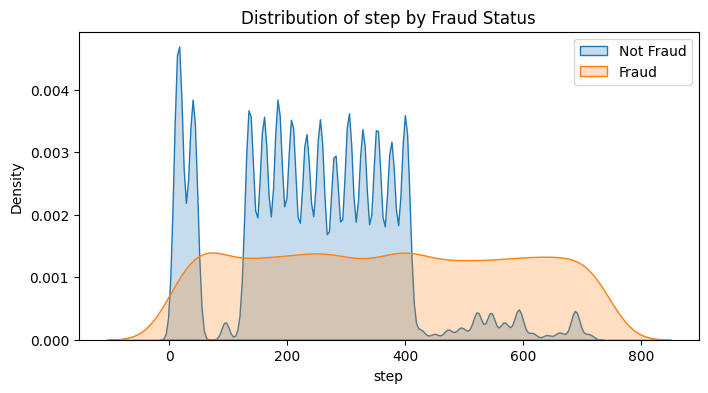

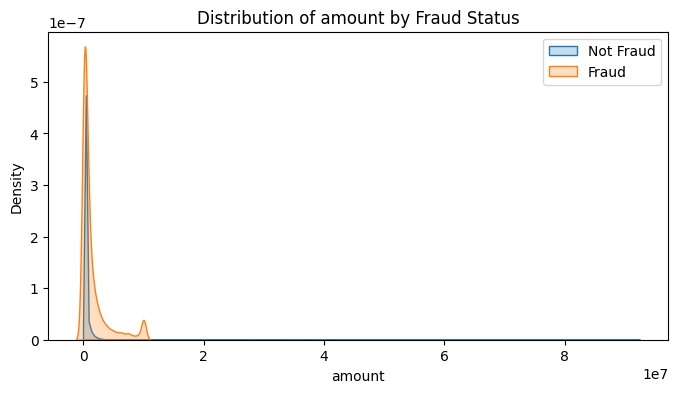

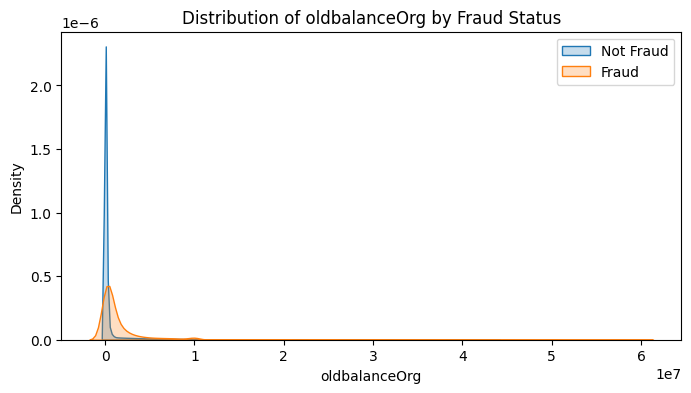

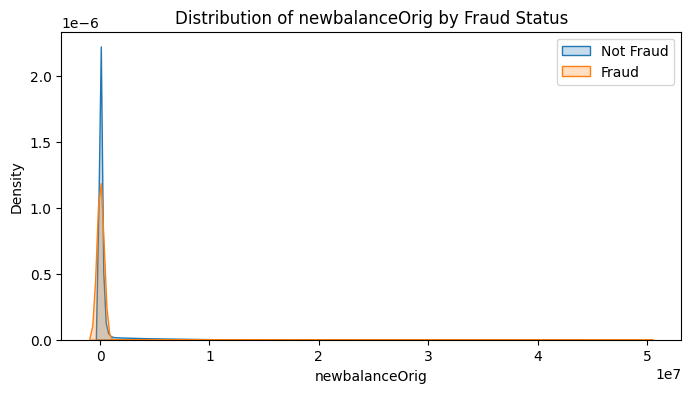

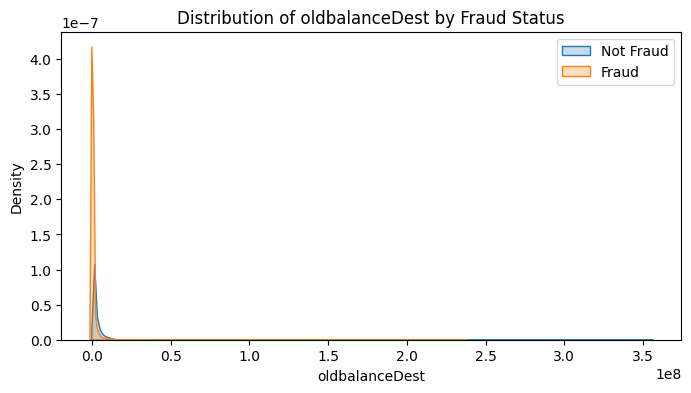

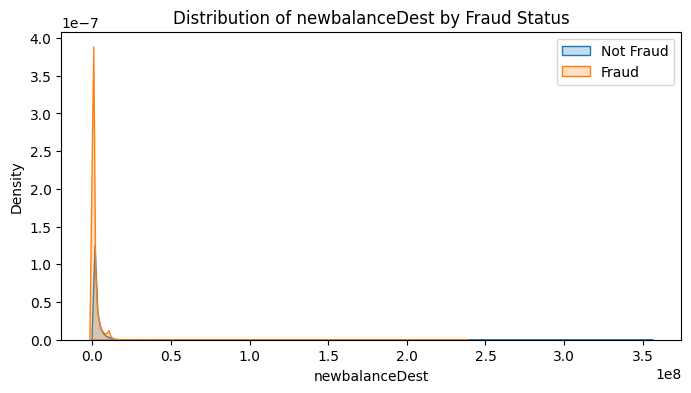

In [ ]:
num_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(df.loc[df['isFraud']==0, col], label='Not Fraud', fill=True)
    sns.kdeplot(df.loc[df['isFraud']==1, col], label='Fraud', fill=True)
    plt.title(f'Distribution of {col} by Fraud Status')
    plt.legend()
    plt.show()

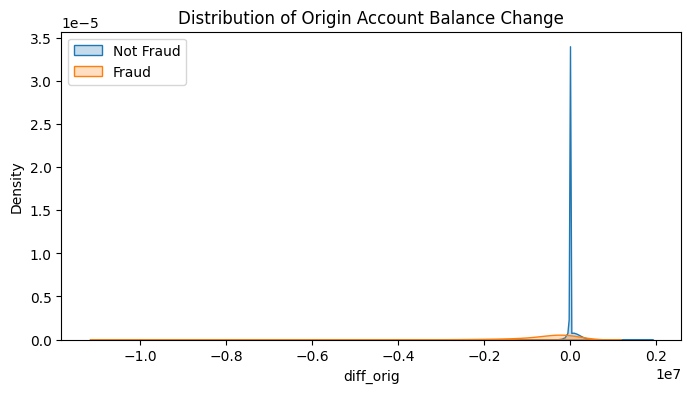

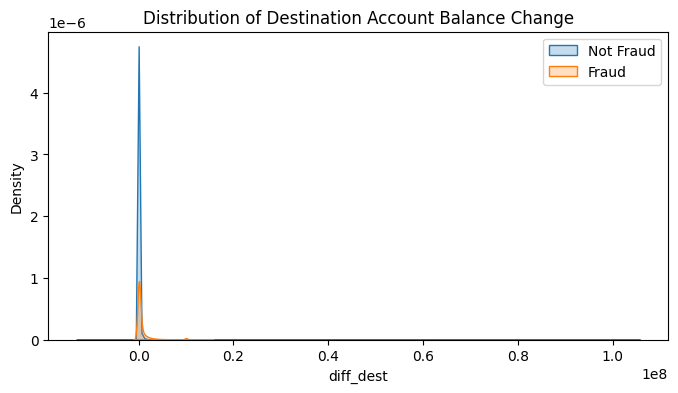

In [ ]:
df['diff_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['diff_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

plt.figure(figsize=(8,4))
sns.kdeplot(df.loc[df['isFraud']==0, 'diff_orig'], label='Not Fraud', fill=True)
sns.kdeplot(df.loc[df['isFraud']==1, 'diff_orig'], label='Fraud', fill=True)
plt.title('Distribution of Origin Account Balance Change')
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
sns.kdeplot(df.loc[df['isFraud']==0, 'diff_dest'], label='Not Fraud', fill=True)
sns.kdeplot(df.loc[df['isFraud']==1, 'diff_dest'], label='Fraud', fill=True)
plt.title('Distribution of Destination Account Balance Change')
plt.legend()
plt.show()


In [ ]:
print("Number of transactions where the transaction amount is negative: " + str(sum(df['amount'] < 0)))
print("Number of transactions where the transaction amount is 0: " + str(sum(df['amount'] == 0)))

Number of transactions where the transaction amount is negative: 0
Number of transactions where the transaction amount is 0: 16


In [ ]:
trans_0 = df[df['amount'] == 0]
trans_0

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,diff_orig,diff_dest
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0,0.0,0.0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0,0.0,0.0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0,0.0,0.0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0,0.0,0.0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0,0.0,0.0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0,0.0,0.0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0,0.0,0.0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0,0.0,0.0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0,0.0,0.0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0,0.0,0.0


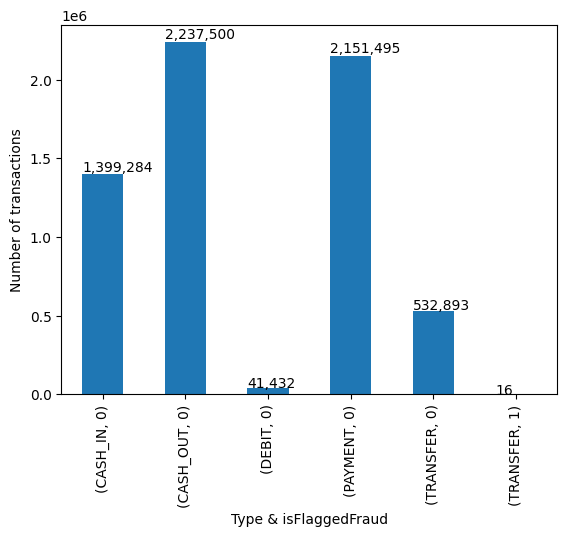

In [ ]:
ax=df.groupby(['type','isFlaggedFraud']).size().plot(kind='bar')
ax.set_title('')
ax.set_xlabel("Type & isFlaggedFraud")
ax.set_ylabel("Number of transactions")
for t in ax.patches:
    ax.annotate(str(format(int(t.get_height()),',d')),(t.get_x(),t.get_height()*1.01))

In [ ]:
fraud_df=df[df['isFraud']==1]


In [ ]:
print(fraud_df.head())

     step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
2       1  TRANSFER    181.0  C1305486145          181.0             0.0   
3       1  CASH_OUT    181.0   C840083671          181.0             0.0   
251     1  TRANSFER   2806.0  C1420196421         2806.0             0.0   
252     1  CASH_OUT   2806.0  C2101527076         2806.0             0.0   
680     1  TRANSFER  20128.0   C137533655        20128.0             0.0   

        nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
2     C553264065             0.0             0.0        1               0   
3      C38997010         21182.0             0.0        1               0   
251   C972765878             0.0             0.0        1               0   
252  C1007251739         26202.0             0.0        1               0   
680  C1848415041             0.0             0.0        1               0   

     diff_orig  diff_dest  
2       -181.0        0.0  
3       -181.0   -21182.

In [ ]:
df['day'] =pd.cut(df['step'],[0,24,48,72,96,120,144,168,192,216,240,264,288,312,336,360,384,408,432,456,480,504,528,552,576,600,624,648,672,
                      696,720,744], labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])

In [ ]:
total_per_day = df.groupby('day').size()


/tmp/ipython-input-2980944308.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_day = df.groupby('day').size()


In [ ]:
fraud_per_day = df[df['isFraud'] == 1].groupby('day').size()


/tmp/ipython-input-1909628219.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_per_day = df[df['isFraud'] == 1].groupby('day').size()


In [ ]:
daily_counts = pd.DataFrame({'total': total_per_day, 'fraud': fraud_per_day}).fillna(0)


In [ ]:
daily_counts['fraud_rate'] = daily_counts['fraud'] / daily_counts['total']
print(daily_counts)



      total  fraud  fraud_rate
day                           
1    574255    271    0.000472
2    455238    309    0.000679
3      1070    310    0.289720
4     28240    262    0.009278
5      9789    252    0.025743
6    441005    228    0.000517
7    420583    272    0.000647
8    449637    278    0.000618
9    417919    255    0.000610
10   392945    282    0.000718
11   417859    262    0.000627
12   349776    298    0.000852
13   428583    242    0.000565
14   397876    246    0.000618
15   401282    250    0.000623
16   375594    252    0.000671
17   425766    320    0.000752
18    20999    268    0.012763
19    11300    256    0.022655
20    19727    236    0.011963
21    24593    272    0.011060
22    53437    256    0.004791
23    51012    216    0.004234
24    32709    280    0.008560
25    57853    240    0.004148
26    13885    272    0.019589
27     8578    280    0.032642
28    14661    248    0.016916
29    54890    260    0.004737
30    11287    268    0.023744
31      

In [ ]:
count = daily_counts.sort_values(by='fraud')
print(count)

      total  fraud  fraud_rate
day                           
23    51012    216    0.004234
6    441005    228    0.000517
20    19727    236    0.011963
25    57853    240    0.004148
13   428583    242    0.000565
14   397876    246    0.000618
28    14661    248    0.016916
15   401282    250    0.000623
16   375594    252    0.000671
5      9789    252    0.025743
9    417919    255    0.000610
22    53437    256    0.004791
19    11300    256    0.022655
29    54890    260    0.004737
11   417859    262    0.000627
4     28240    262    0.009278
30    11287    268    0.023744
18    20999    268    0.012763
1    574255    271    0.000472
31      272    272    1.000000
21    24593    272    0.011060
7    420583    272    0.000647
26    13885    272    0.019589
8    449637    278    0.000618
27     8578    280    0.032642
24    32709    280    0.008560
10   392945    282    0.000718
12   349776    298    0.000852
2    455238    309    0.000679
3      1070    310    0.289720
17   425

In [ ]:
count = daily_counts.sort_values(by='fraud_rate', ascending=False)
print(count)

      total  fraud  fraud_rate
day                           
31      272    272    1.000000
3      1070    310    0.289720
27     8578    280    0.032642
5      9789    252    0.025743
30    11287    268    0.023744
19    11300    256    0.022655
26    13885    272    0.019589
28    14661    248    0.016916
18    20999    268    0.012763
20    19727    236    0.011963
21    24593    272    0.011060
4     28240    262    0.009278
24    32709    280    0.008560
22    53437    256    0.004791
29    54890    260    0.004737
23    51012    216    0.004234
25    57853    240    0.004148
12   349776    298    0.000852
17   425766    320    0.000752
10   392945    282    0.000718
2    455238    309    0.000679
16   375594    252    0.000671
7    420583    272    0.000647
11   417859    262    0.000627
15   401282    250    0.000623
14   397876    246    0.000618
8    449637    278    0.000618
9    417919    255    0.000610
13   428583    242    0.000565
6    441005    228    0.000517
1    574

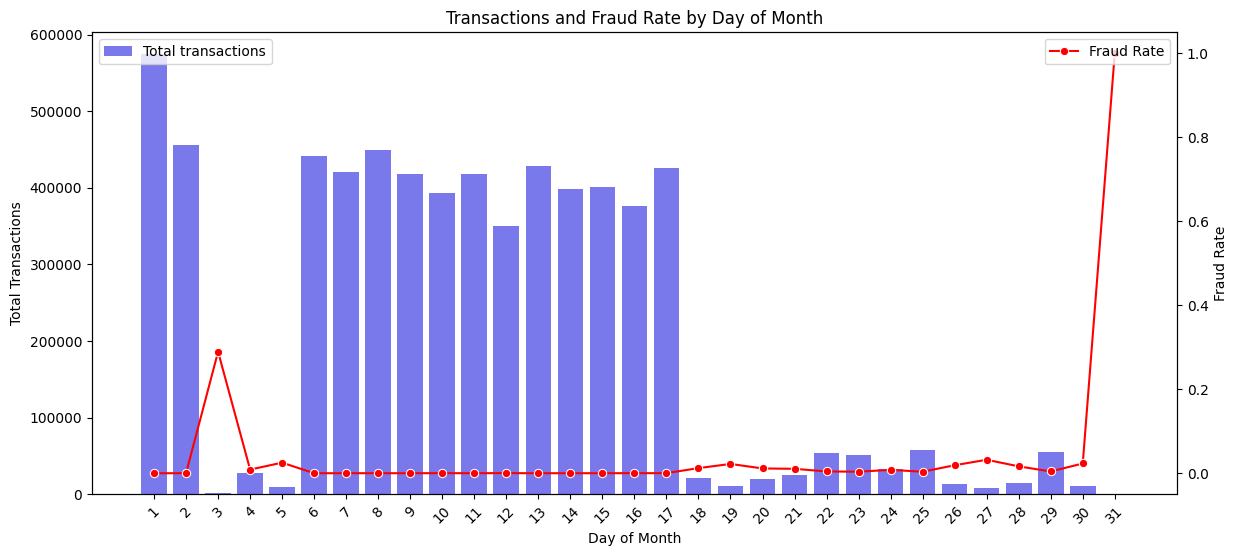

In [ ]:
fig, ax1 = plt.subplots(figsize=(14,6))

sns.barplot(x=daily_counts.index.astype(str), y=daily_counts['total'], alpha=0.6, color='blue', label='Total transactions', ax=ax1)
ax1.set_ylabel('Total Transactions')
ax1.set_xlabel('Day of Month')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
sns.lineplot(x=daily_counts.index.astype(str), y=daily_counts['fraud_rate'], marker='o', color='red', label='Fraud Rate', ax=ax2)
ax2.set_ylabel('Fraud Rate')

plt.title('Transactions and Fraud Rate by Day of Month')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
fraud_per_day = df.groupby('day')['isFraud'].sum().reset_index()
print(fraud_per_day)


   day  isFraud
0    1      271
1    2      309
2    3      310
3    4      262
4    5      252
5    6      228
6    7      272
7    8      278
8    9      255
9   10      282
10  11      262
11  12      298
12  13      242
13  14      246
14  15      250
15  16      252
16  17      320
17  18      268
18  19      256
19  20      236
20  21      272
21  22      256
22  23      216
23  24      280
24  25      240
25  26      272
26  27      280
27  28      248
28  29      260
29  30      268
30  31      272


/tmp/ipython-input-2388348588.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_per_day = df.groupby('day')['isFraud'].sum().reset_index()


In [ ]:
df['hourOfDay']=df['step']%24





In [ ]:
# Sum of fraud cases per hour of the day
fraud_per_hour = df.groupby('hourOfDay')['isFraud'].sum().reset_index()

print(fraud_per_hour)


    hourOfDay  isFraud
0           0      300
1           1      358
2           2      372
3           3      326
4           4      274
5           5      366
6           6      358
7           7      328
8           8      368
9           9      341
10         10      375
11         11      324
12         12      339
13         13      346
14         14      353
15         15      341
16         16      345
17         17      353
18         18      343
19         19      342
20         20      340
21         21      347
22         22      351
23         23      323


In [ ]:
hourly_stats = df.groupby('hourOfDay').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
).reset_index()

hourly_stats['fraud_rate'] = hourly_stats['total_fraud'] / hourly_stats['total_transactions']

print(hourly_stats)

    hourOfDay  total_transactions  total_fraud  fraud_rate
0           0               71587          300    0.004191
1           1               27111          358    0.013205
2           2                9018          372    0.041251
3           3                2007          326    0.162431
4           4                1241          274    0.220790
5           5                1641          366    0.223035
6           6                3420          358    0.104678
7           7                8988          328    0.036493
8           8               26915          368    0.013673
9           9              283518          341    0.001203
10         10              425729          375    0.000881
11         11              445992          324    0.000726
12         12              483418          339    0.000701
13         13              468474          346    0.000739
14         14              439653          353    0.000803
15         15              416686          341    0.0008

In [ ]:
hourly_stats_sorted = hourly_stats.sort_values(by='fraud_rate', ascending=False)

print(hourly_stats_sorted)

    hourOfDay  total_transactions  total_fraud  fraud_rate
5           5                1641          366    0.223035
4           4                1241          274    0.220790
3           3                2007          326    0.162431
6           6                3420          358    0.104678
2           2                9018          372    0.041251
7           7                8988          328    0.036493
8           8               26915          368    0.013673
1           1               27111          358    0.013205
0           0               71587          300    0.004191
23         23              141257          323    0.002287
22         22              194555          351    0.001804
21         21              247806          347    0.001400
9           9              283518          341    0.001203
10         10              425729          375    0.000881
15         15              416686          341    0.000818
14         14              439653          353    0.0008

/tmp/ipython-input-3791273258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_stats_sorted, x='hourOfDay', y='fraud_rate', palette='Reds_r')


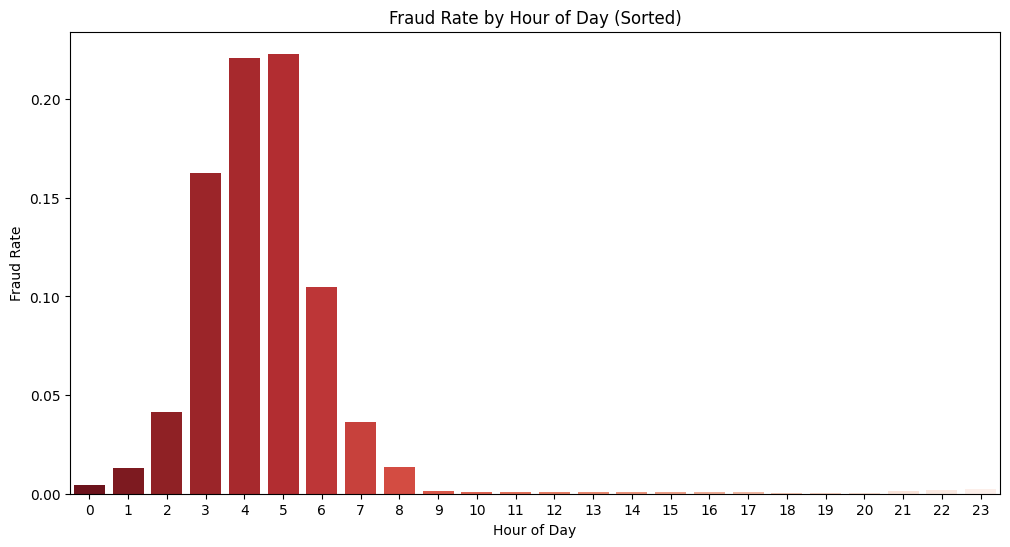

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=hourly_stats_sorted, x='hourOfDay', y='fraud_rate', palette='Reds_r')
plt.title('Fraud Rate by Hour of Day (Sorted)')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.show()

In [ ]:
df_transfer_f=df[(df['type']=='TRANSFER')&(df['isFlaggedFraud']==1)]
print("Min and Max transactions when the transaction is flagged fraud",(df_transfer_f['amount'].min(),df_transfer_f['amount'].max()))
df_transfer_nf=df[(df['type']=='TRANSFER')&(df['isFlaggedFraud']==0)]
print("Min and Max transactions when the transaction is not flagged fraud",(df_transfer_nf['amount'].min(),df_transfer_nf['amount'].max()))

Min and Max transactions when the transaction is flagged fraud (353874.22, 10000000.0)
Min and Max transactions when the transaction is not flagged fraud (2.6, 92445516.64)


In [ ]:
df_transfer_t=df[(df['type']=='TRANSFER')&(df['isFraud']==1)]
print("Min and Max transactions when the transaction is fraud",(df_transfer_t['amount'].min(),df_transfer_t['amount'].max()))
print("Average transaction amount when the transaction is fraud:", df_transfer_t['amount'].mean())
print("Standard deviation of transaction amount when the transaction is fraud:", df_transfer_t['amount'].std())



Min and Max transactions when the transaction is fraud (63.8, 10000000.0)
Average transaction amount when the transaction is fraud: 1480891.6729338542
Standard deviation of transaction amount when the transaction is fraud: 2414890.378716088


In [ ]:
df_transfer_nt=df[(df['type']=='TRANSFER')&(df['isFraud']==0)]
print("Min and Max transactions when the transaction is not flagged fraud",(df_transfer_nt['amount'].min(),df_transfer_nt['amount'].max()))
print("Average transaction amount when the transaction is not fraud:", df_transfer_nt['amount'].mean())
print("Standard deviation of transaction amount when the transaction is not fraud:", df_transfer_nt['amount'].std())

Min and Max transactions when the transaction is not flagged fraud (2.6, 92445516.64)
Average transaction amount when the transaction is not fraud: 906229.0078121523
Standard deviation of transaction amount when the transaction is not fraud: 1874155.2587668167


In [ ]:
X=df.loc[(df.type=='TRANSFER')|(df.type=='CASH_OUT')]
y=X['isFraud']

In [ ]:
y.value_counts()


,count
isFraud,
0,2762196
1,8213


In [ ]:
X[(X['newbalanceOrig']==0)&(X['newbalanceDest']==0)].shape


(14100, 15)

In [ ]:
(X[(X['newbalanceDest']==0)&(X['oldbalanceDest']==0)&(X['isFraud']==1)&(X['amount']>0)].shape[0])/(X[X['isFraud']==1].shape[0])


0.4955558261293072

In [ ]:
(X[(X['newbalanceDest']==0)&(X['oldbalanceDest']==0)&(X['isFraud']==0)&(X['amount']>0)].shape[0])/(X[X['isFraud']==0].shape[0])

0.0006176245277308345

In [ ]:
X_corr = X.drop(columns=['nameOrig', 'nameDest']).corr()


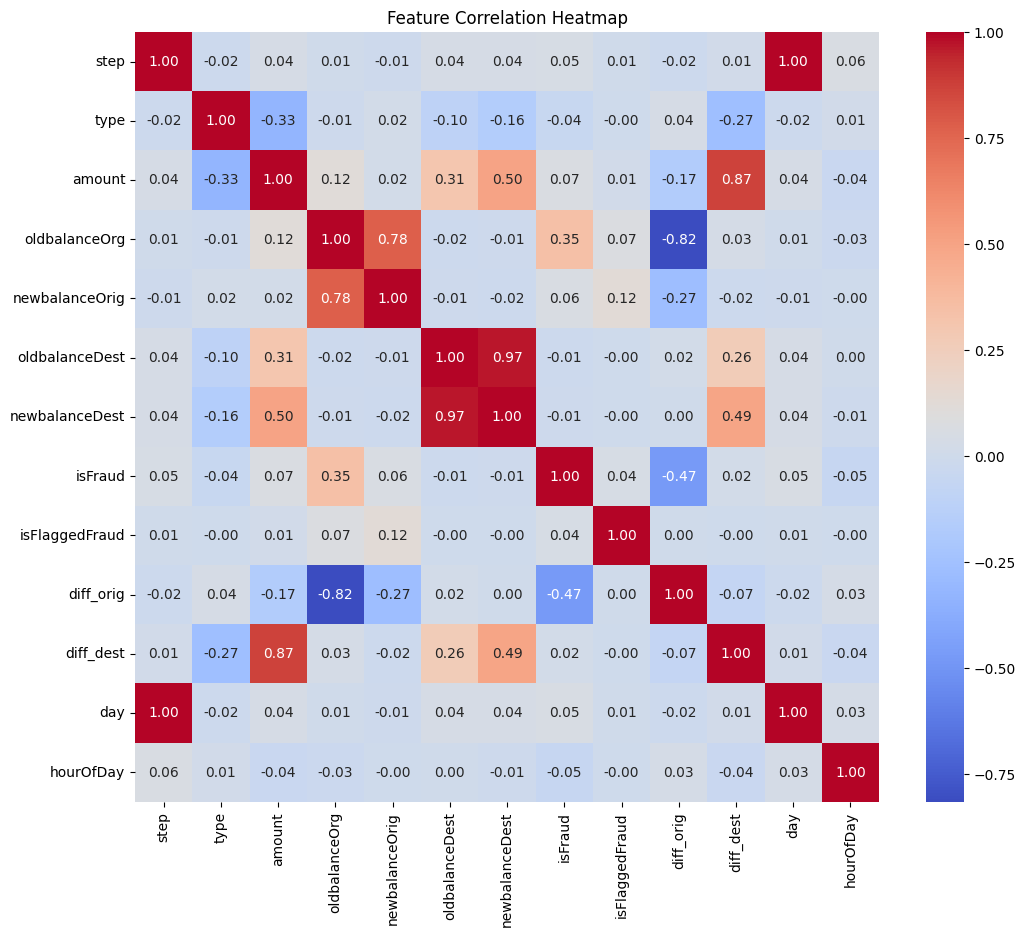

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(X_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()